In [1]:
''' Collectiong Data '''

' Collectiong Data '

In [2]:
import numpy as np
import pandas as pd

In [3]:
data=pd.read_csv("mcdonalds.csv")

In [4]:
data.columns.values.tolist()

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [5]:
data.shape

(1453, 15)

In [6]:
data.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [7]:
''' Preparing the Data '''

' Preparing the Data '

In [8]:
MD= data.iloc[:,0:11].replace("Yes",1).replace("No",0)

In [9]:
mean = round(MD.mean(),2)
mean

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [10]:
''' Choosing Model '''

' Choosing Model '

In [11]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [12]:
# Principle Common Analysis - it is a powerful technique used in data analysis, particularly for reducing the dimensionality of datasets while preserving crucial information.

pca = PCA() # pca object is created
MD_pca = pca.fit(MD) # pca.fit then fits the PCA model to the required data
#MD_p = pca.fit(MD)

StandardDeviation = np.sqrt(pca.explained_variance_)  # This calculates the standard deviation of each principal component. The explained variance is the eigenvalues of the covariance matrix
ProportionVariance = pca.explained_variance_ratio_ # This gives the proportion of the datasets variance that lies among each components.
index = []
for i in range(len(StandardDeviation)):
  i = i+1
  index.append(format(i)) # here, values are initialised one by one.

sum = pd.DataFrame({"StandardDeviation": StandardDeviation, "Proportion of Variance": ProportionVariance, "Cumulative Proportion": ProportionVariance.cumsum()}, index= index)


In [13]:
sum

,StandardDeviation,Proportion of Variance,Cumulative Proportion
1,0.757050,0.299447,0.299447
2,0.607456,0.192797,0.492244
3,0.504619,0.133045,0.625290
4,0.398799,0.083096,0.708386
5,0.337405,0.059481,0.767866
6,0.310275,0.050300,0.818166
7,0.289697,0.043849,0.862015
8,0.275122,0.039548,0.901563
9,0.265251,0.036761,0.938323
10,0.248842,0.032353,0.970677


In [14]:
print("Standard Deviation:\n",StandardDeviation.round(1))

Standard Deviation:
 [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


In [15]:
weight = (pca.components_) # it stores the principal components in the variable.
i=0
transposed_matrix = MD_pca.components_.T # .T transforms the matrix and stores it into the another.

transposed_df = pd.DataFrame(transposed_matrix, index=MD.columns.values, columns=index) # This line is converting the transposed matrix into a pandas DataFrame with the column names as indices and the list index as column names
transposed_df=round(-transposed_df,3) # rounding the pandas dataframe upto values of 3
transposed_df

,1,2,3,4,5,6,7,8,9,10,11
yummy,0.477,-0.364,0.304,-0.055,0.308,-0.171,0.281,-0.013,-0.572,0.110,-0.045
convenient,0.155,-0.016,0.063,0.142,-0.278,0.348,0.060,0.113,0.018,0.666,0.542
spicy,0.006,-0.019,0.037,-0.198,-0.071,0.355,-0.708,-0.376,-0.400,0.076,-0.142
fattening,-0.116,0.034,0.322,0.354,0.073,0.407,0.386,-0.590,0.161,0.005,-0.251
greasy,-0.304,0.064,0.802,-0.254,-0.361,-0.209,-0.036,0.138,0.003,-0.009,-0.002
fast,0.108,0.087,0.065,0.097,-0.108,0.595,0.087,0.628,-0.166,-0.240,-0.339
cheap,0.337,0.611,0.149,-0.119,0.129,0.103,0.040,-0.140,-0.076,-0.428,0.489
tasty,0.472,-0.307,0.287,0.003,0.211,0.077,-0.360,0.073,0.639,-0.079,-0.020
expensive,-0.329,-0.601,-0.024,-0.068,0.003,0.261,0.068,-0.030,-0.067,-0.454,0.490
healthy,0.214,-0.077,-0.192,-0.763,-0.288,0.178,0.350,-0.176,0.186,0.038,-0.158


In [16]:
pip install bioinfokit #The bioinfokit toolkit aimed to provide various easy-to-use functionalities to analyze, visualize, and interpret the biological data generated from genome-scale omics experiments.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.3-py3-none-any.whl size=59055 sha256=e0ce8674760224ca352870df9725cb8cb6b56845175c2ccead1d967b82779fc1
  Stored in directory: /root/.cache/pip/wheels/ac/67/a7/4e0b4172d5415933127e819d7d7080ae08a6220949ad2f6de5
Successfully built bioinfokit


In [17]:
from sklearn.cluster import KMeans
from bioinfokit.visuz import cluster
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [18]:
''' Extracting Segments '''

' Extracting Segments '

In [19]:
np.random.seed(1234) # The numpy random seed is a numerical value that generates a new set or repeats pseudo-random numbers

rep = 10 # this will repeat the KMeans a number of times
segments = range(1,9) #  this sets a range of values the KMeans algo will be using
cluster_dist = [] # this will store the sum of  distances of samples to their closest cluster center for each value of k.
MD_km28= {} # this makes an empty dictionary

# here KMeans clustering groups similar items into k cluster, initializing ‘k’ centroids randomly, then assigning each data point to the nearest centroid, and finally moving each centroid to the average location of its points.
for k in segments:
  kmeans = KMeans(n_clusters = k, n_init = rep, random_state = 1234)
  kmeans.fit(MD)
  cluster_dist.append((kmeans.inertia_))

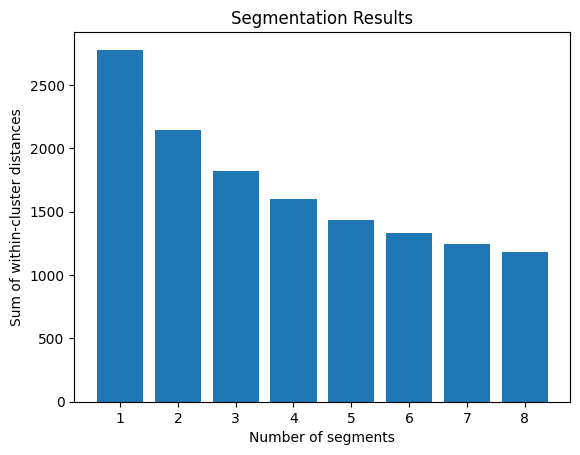

In [20]:
plt.bar(segments, cluster_dist)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()

# the sum of distances within market segments drops slowly as the number of market segments increases. We expect the values to decrease because more market segments automatically mean that the segments are smaller and, as a consequence, that segment members are more similar to one another

In [21]:
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

In [22]:
np.random.seed(1234)
boot = 100
rep = 10

samples = []
for _ in range(boot):
    sample = resample(MD.values, random_state=1234)
    samples.append(sample)

adjusted_rand_index = []
num_segments = range(2, 9)
for k in num_segments:
    stability_scores = []
    for bootstrap_sample in samples:
        kmeans = KMeans(n_clusters=k, n_init=rep, random_state=1234)
        kmeans.fit(sample)
        cluster_labels = kmeans.predict(sample)
        true_labels = kmeans.predict(MD.values)
        stability_score = adjusted_rand_score(true_labels, cluster_labels)
        stability_scores.append(stability_score)
    adjusted_rand_index.append(stability_scores)

# Transpose the adjusted_rand_index list
adjusted_rand_index = np.array(adjusted_rand_index).T

#The ARI measures the similarity of the two data clusterings, ignoring permutations and with chance normalization. A higher ARI indicates that the clustering is more stable.


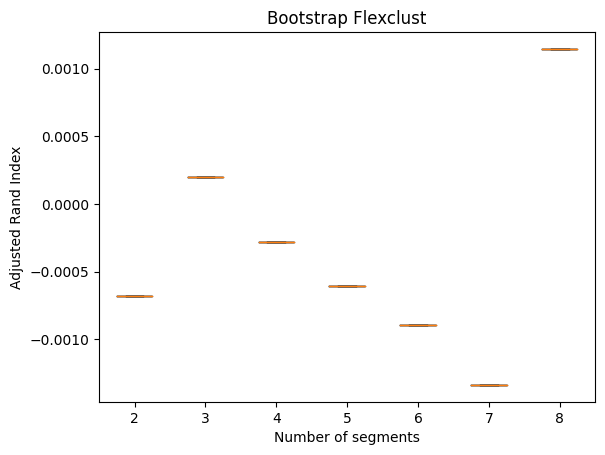

In [23]:
# Create boxplot of adjusted Rand index
plt.boxplot(adjusted_rand_index, labels=num_segments, whis=10)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap Flexclust")
plt.show()

# The vertical boxplots show the distribution of stability for each number of segments

In [24]:
from scipy.stats import entropy

In [25]:
np.random.seed(1234)
k_values = range(2, 9)
MD_m28 = []

# here, it will extraxt segments using random values

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(MD.values)
    iter_val = model.n_iter_
    converged = True
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = MD.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy

    # The mixture model maximises the likelihood to extract segments

    MD_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))
MD_m28 = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

print(MD_m28)

# This is used to determine the optimal number of clusters for K-means clustering by comparing different information criteria like Information criteria calculation:
# For each model, the script calculates the log-likelihood, Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC), and Integrated Completed Likelihood (ICL). These are measures used to compare different models and choose the one that best fits the data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

   iter  converged  k  k0       logLik          AIC          BIC          ICL
0     6       True  2   2 -2145.503727  4295.007454  4305.570225  4304.904547
1     6       True  3   3 -1818.717659  3643.435318  3659.279475  3658.209672
2     9       True  4   4 -1604.107292  3216.214583  3237.340126  3235.989403
3    11       True  5   5 -1434.610417  2879.220835  2905.627763  2904.035975
4     8       True  6   6 -1331.652440  2675.304880  2706.993194  2705.228430
5     6       True  7   7 -1248.417887  2510.835774  2547.805474  2545.884829
6     9       True  8   8 -1182.100019  2380.200037  2422.451123  2420.433939


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


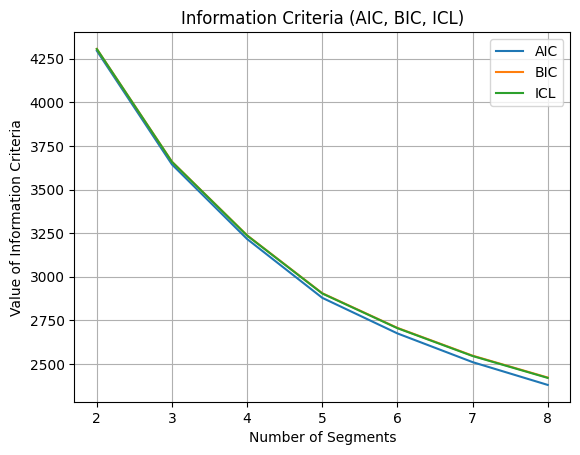

In [26]:
num_segments = MD_m28["k"]
AIC_values = MD_m28["AIC"]
BIC_values = MD_m28["BIC"]
ICL_values = MD_m28["ICL"]

plt.plot(num_segments, AIC_values, label='AIC')
plt.plot(num_segments, BIC_values, label='BIC')
plt.plot(num_segments, ICL_values, label='ICL')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)

# As can be seen, the values of all information criteria decrease quite dramatically until four components are reached.
# The visual inspection suggests that four market segments might be a good solution if a more crucial point of view is taken;
plt.show()
# This plot can help in model selection by identifying the number of segments for which the information criteria values are minimized.

In [27]:
from sklearn.mixture import GaussianMixture

In [28]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(MD)
kmeans_clusters = kmeans.predict(MD)

gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(MD)
gmm_clusters = gmm.predict(MD)

results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

MD_m4 = MD[results['mixture'] == 3]

k4_m4 = KMeans(n_clusters=k, random_state=1234)

k4_m4.fit(MD_m4)

k4_m4_clusters = k4_m4.predict(MD_m4)

results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

# K-means clustering on the dataset with k = 4 clusters then it firs model and then predict it Gaussian Mixture model used k components and get trains and ready for prediction

# The two results from both K-means and GMM are used for comparison.

# Finally, it prints two cross-tabulation tables. The first table compares the cluster assignments from K-means and GMM for all data points. The second table compares the cluster assignments from K-means for all data points and for the subset of data.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


mixture   0    1   2    3
kmeans                   
0        20  302   0  191
1         2  116  59  189
2        90   30  14  108
3        17  150   1  164
kmeans   0   1   2   3
kmeans                
0       76  52  73  32
1       40  39  51  27
2       27  30  31  11
3       43  35  51  34


In [29]:
from sklearn.mixture import GaussianMixture
import numpy as np

gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(MD)

log_likelihood_m4a = gmm_m4a.score(MD)

gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(MD)

log_likelihood_m4 = gmm_m4.score(MD)

print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)

# here, the model gets fitted using 4 components and calculation the log likelihood using the scoree method which though explians the obv data
# The log-likelihood can be used to compare different models, with higher values indicating better fit

Log-likelihood for MD.m4a: 11.727872558164462
Log-likelihood for MD.m4: 11.151316714845965


In [30]:
like_counts = pd.value_counts(data['Like'])

# here, its colleccting data based on the likes and putting into a pandas dataframe for evaluation

print(like_counts.iloc[::-1])

-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: Like, dtype: int64


In [31]:
like_mapping = {
    'I HATE IT!-5': -5,'-4': -4,'-3': -3,'-2': -2,'-1': -1,'0': 0,'1': 1,'2': 2,'3': 3,'4': 4,
    'I LOVE IT!+5': 5
}

data['Like.n'] = data['Like'].map(like_mapping)

print(data['Like.n'].value_counts())



# it is a form of data cleaning wgere the similar data for an instance have been groupped into one

 0.0    169
-3.0     73
-4.0     71
-2.0     59
-1.0     58
Name: Like.n, dtype: int64


In [32]:
from patsy import dmatrices

In [37]:
independent_vars = data.columns[0:11]

formula_str = 'Like ~ ' + ' + '.join(independent_vars)

formulae = dmatrices(formula_str, data=data)[1]
print(formulae)

# dmatrices function create design matrics from a formula and a dataset. it uses content of like as a formula while data from given datset and making m=a matric out of it

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [34]:
from patsy import dmatrix

In [38]:
np.random.seed(1234)

X = dmatrix(formulae.design_info, data=data) # this line creates a design matrix using the formula
y = dmatrix('Like', data=data) # this line creates a design matrix y using like components from the datasets

n_components = 2
n_init = 10
verbose = False
n_rep=10

model = GaussianMixture(n_components=n_components, n_init=n_init, verbose=verbose)
MD_reg2 = model.fit(X, y)

#  This line initializes a Gaussian Mixture Model with the specified number of components and initialization and fits the model to data

print(MD_reg2)
cluster_sizes = np.bincount(model.predict(X))
# The cluster size is returned depending upon the inputs that have been used as For each cluster, it prints the cluster number (starting from 1) and the size of the cluster (the number of data points assigned to that cluster).

print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")

GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
1: 468
2: 985


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


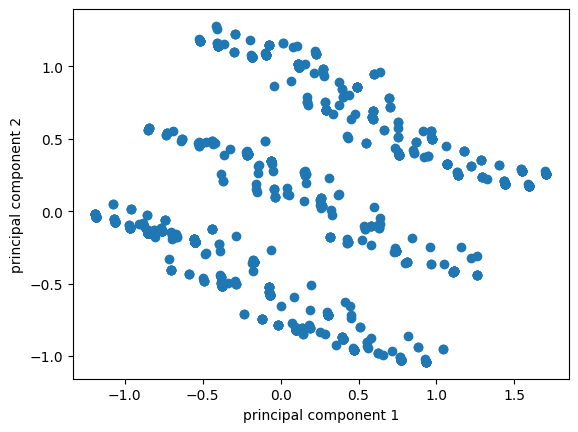

In [39]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=4)
kmeans.fit(MD)

pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD)

fig, ax = plt.subplots()

ax.scatter(MD_pca[:, 0], MD_pca[:, 1])
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.show()

# This plot shows the diff between two principle components which have been tranformed and fitted using KMeans clustering inputs with 4 clusters

In [40]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
from sklearn.preprocessing import LabelEncoder

def labelling(x):
    data[x] = LabelEncoder().fit_transform(data[x])
    return data
# here, the data has been convert categorical values into numerical values

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
data


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Like.n
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,-3.0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,NaN
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,NaN
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,NaN
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male,NaN
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female,NaN
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female,NaN
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male,NaN


In [41]:
df_eleven = data.loc[:,cat]
df_eleven

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [ ]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

# it tells us about the liking of individuals.
# the chart appears to be a visual representation of opinions or ratings for three different items or categories.
# The red cells are labeled “I hate it”, the orange cells are labeled “I hate it-5”, the yellow cells are labeled “I love it-5”, the green cells are labeled “I love it”, and the blue cells are labeled “I hate it-5”.

In [47]:
data['VisitFrequency'] = LabelEncoder().fit_transform(data['VisitFrequency'])
visit = data.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


In [48]:
#Like
data['Like'] = LabelEncoder().fit_transform(data['Like'])
Like = data.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

# it providing cluster on like to distinguish between the choices among them

,cluster_num,Like
0,0,3.798762
1,1,3.794828
2,2,5.430921
3,3,6.739837


In [49]:
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
Gender = data.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

# it providing cluster on gender to distinguish between the choices among them

,cluster_num,Gender
0,0,0.523220
1,1,0.398276
2,2,0.411184
3,3,0.569106


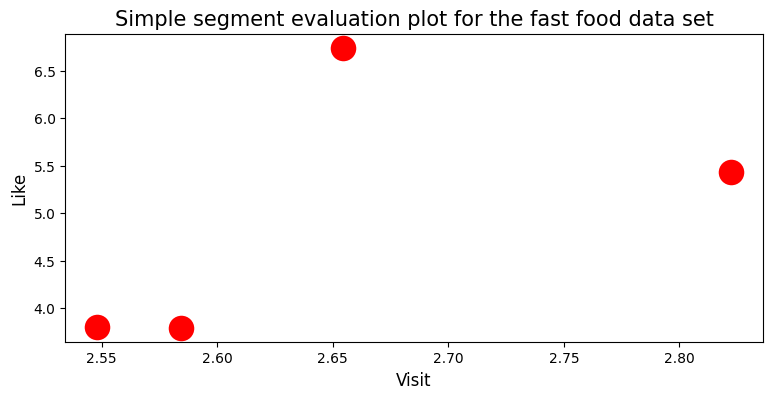

In [50]:
import seaborn as sns
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",fontsize = 15)
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.show()

# this graph shows visualization between the choices of likes and visiting to help in better growth